# Model Selection

In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/USER/Documents/QQQ Project/data/processed/final_dataset.csv")
df.head()


,TP_hit,entry_date,MA100_MA200,ATR_ratio,MA50_MA100,ATR14,MA20_MA100,Close_MA50,MA20_MA200_norm,Close_MA20,pullback_depth,MA20_MA50
0,0,2015-12-04,0.550911,0.077272,1.279202,8.316843,4.212639,0.043612,0.047023,0.014749,-0.014535,2.933438
1,0,2015-12-10,0.467671,0.076652,2.210054,8.125476,4.218057,0.018352,0.046203,-0.000921,0.000922,2.008004
2,0,2015-12-11,0.438402,0.077154,2.384827,7.990462,4.174187,-0.006615,0.045475,-0.023377,0.023937,1.789359
3,0,2015-12-14,0.421525,0.076704,2.530071,8.003985,4.260631,-0.000450,0.046155,-0.016749,0.017034,1.730561
4,0,2015-12-15,0.415716,0.077134,2.643556,8.097958,4.288399,0.004414,0.046362,-0.011147,0.011272,1.644842


In [4]:
label = 'TP_hit'

features = [
    'MA100_MA200',
    'ATR_ratio',
    'MA50_MA100',
    'ATR14',
    'MA20_MA100',
    'Close_MA50',
    'MA20_MA200_norm',
    'Close_MA20',
    'pullback_depth',
    'MA20_MA50'
]

X = df[features]
y = df[label]


Time Series so cannot use train_test_split, data leakage

In [5]:
split = int(len(df) * 0.7)

X_train = X.iloc[:split]
y_train = y.iloc[:split]

X_test  = X.iloc[split:]
y_test  = y.iloc[split:]

Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
proba_lr = lr.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, proba_lr))
print(classification_report(y_test, pred_lr))


AUC: 0.6380638063806381
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       101
           1       0.00      0.00      0.00         9

    accuracy                           0.92       110
   macro avg       0.46      0.50      0.48       110
weighted avg       0.84      0.92      0.88       110



c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
proba_rf = rf.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, proba_rf))
print(classification_report(y_test, pred_rf))


AUC: 0.7810781078107811
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       101
           1       0.00      0.00      0.00         9

    accuracy                           0.92       110
   macro avg       0.46      0.50      0.48       110
weighted avg       0.84      0.92      0.88       110



c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\Documents\QQQ Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=700,
    max_depth=5,
    learning_rate=0.02,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)

pred_xgb = xgb.predict(X_test)
proba_xgb = xgb.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, proba_xgb))
print(classification_report(y_test, pred_xgb))


AUC: 0.704070407040704
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       101
           1       0.00      0.00      0.00         9

    accuracy                           0.90       110
   macro avg       0.46      0.49      0.47       110
weighted avg       0.84      0.90      0.87       110



<Figure size 800x600 with 0 Axes>

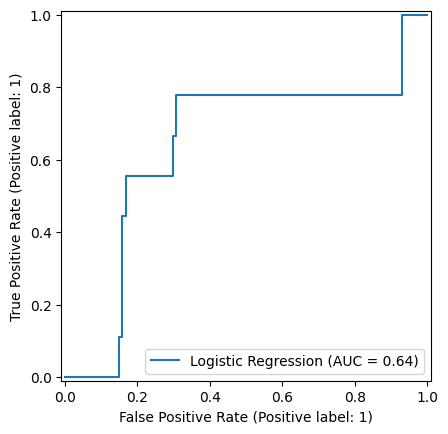

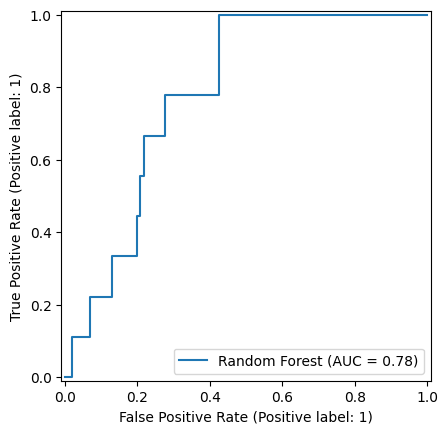

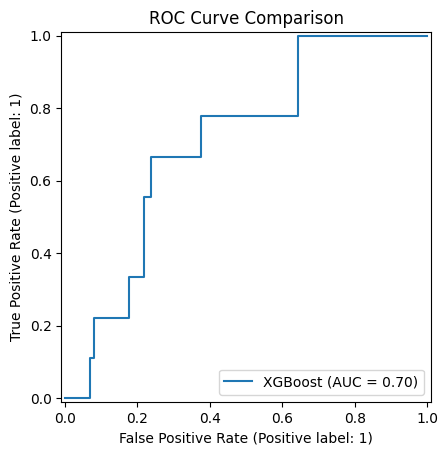

In [9]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, proba_lr, name="Logistic Regression")
RocCurveDisplay.from_predictions(y_test, proba_rf, name="Random Forest")
RocCurveDisplay.from_predictions(y_test, proba_xgb, name="XGBoost")
plt.title("ROC Curve Comparison")
plt.show()


In [10]:
import numpy as np

importance = xgb.feature_importances_
imp_df = pd.DataFrame({'Feature': features, 'Importance': importance})
imp_df = imp_df.sort_values('Importance', ascending=False)
imp_df


,Feature,Importance
1,ATR_ratio,0.142145
0,MA100_MA200,0.130706
7,Close_MA20,0.119305
2,MA50_MA100,0.110456
4,MA20_MA100,0.098679
5,Close_MA50,0.097916
8,pullback_depth,0.093265
9,MA20_MA50,0.088153
3,ATR14,0.060402
6,MA20_MA200_norm,0.058974


In [11]:
import numpy as np
from sklearn.metrics import f1_score

proba = proba_xgb

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (proba >= t).astype(int)) for t in thresholds]

best_t = thresholds[np.argmax(f1_scores)]
print("Best threshold:", best_t)


Best threshold: 0.14999999999999997


# XGBOOST

In [12]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

df_ml_data = pd.read_csv("C:/Users/USER/Documents/QQQ Project/data/processed/final_dataset.csv")

df_ml_data['entry_date'] = pd.to_datetime(df_ml_data['entry_date'])

y = df_ml_data['TP_hit']
X = df_ml_data.drop(columns=['TP_hit','entry_date'])


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
) 

In [14]:
xgb = XGBClassifier(
    n_estimators=700,
    max_depth=5,
    learning_rate=0.02,
    subsample=0.9,
    colsample_bytree=0.9,
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42
)

xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [15]:
pred = xgb.predict(X_test)
proba = xgb.predict_proba(X_test)[:,1]

print("AUC:", roc_auc_score(y_test, proba))
print(classification_report(y_test, pred))


AUC: 0.8705882352941177
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        68
           1       0.12      0.20      0.15         5

    accuracy                           0.85        73
   macro avg       0.53      0.55      0.54        73
weighted avg       0.88      0.85      0.87        73



In [16]:
df_ml_data['ML_prob'] = xgb.predict_proba(X)[:,1]


In [17]:
df = pd.read_csv("C:/Users/USER/Documents/QQQ Project/data/processed/full_QQQ_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()


ValueError: time data "Date" doesn't match format "%Y-%m-%d", at position 6712. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA100'] = df['Close'].rolling(100).mean()
df['MA200'] = df['Close'].rolling(200).mean()

df['TrendAligned'] = (
    (df['MA20'] > df['MA50']) &
    (df['MA50'] > df['MA100']) &
    (df['MA100'] > df['MA200'])
)

df['H-L']  = df['High'] - df['Low']
df['H-PC'] = (df['High'] - df['Close'].shift(1)).abs()
df['L-PC'] = (df['Low']  - df['Close'].shift(1)).abs()
df['TR'] = df[['H-L','H-PC','L-PC']].max(axis=1)
df['ATR14'] = df['TR'].rolling(14).mean()
df = df.drop(columns=['H-L','H-PC','L-PC','TR'])


In [ ]:
df_ml = df.loc[df.index >= df.index.max() - pd.Timedelta(days=10*365)]


In [ ]:
prob_map = df_ml_data[['entry_date','ML_prob']].set_index('entry_date')

df_ml['ML_prob'] = prob_map['ML_prob']
df_ml['ML_prob'] = df_ml['ML_prob'].fillna(0)
